# 07 - Airbnb price prediction

### Cargar data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('airbnb_data.csv')

df.head()

/Users/iudh/opt/anaconda3/envs/clase/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


### EDA

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [4]:
df.last_review.unique()   # valores unicos de esa columna

array(['16/02/20', '07/09/20', '30/11/19', ..., '30/03/14', '28/12/14',
       '29/04/15'], dtype=object)

In [5]:
df=df.drop(columns=['id', 'host_id', 'host_name', 'neighbourhood_group', 'last_review', 'reviews_per_month',
                   'neighbourhood', 'name', 'city'])

df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,35.65146,-82.62792,Private room,60,1,138,1,0
1,35.59779,-82.55540,Entire home/apt,470,1,114,11,288
2,35.60670,-82.55563,Entire home/apt,75,30,89,2,298
3,35.57864,-82.59578,Entire home/apt,90,1,267,5,0
4,35.61442,-82.54127,Private room,125,30,58,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   latitude                        226030 non-null  float64
 1   longitude                       226030 non-null  float64
 2   room_type                       226030 non-null  object 
 3   price                           226030 non-null  int64  
 4   minimum_nights                  226030 non-null  int64  
 5   number_of_reviews               226030 non-null  int64  
 6   calculated_host_listings_count  226030 non-null  int64  
 7   availability_365                226030 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 13.8+ MB


In [7]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [8]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,226030.000000,226030.000000
mean,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,16.698562,159.314856
std,6.849855,26.222091,570.353609,2.103376e+05,63.602914,51.068966,140.179628
min,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,1.000000,0.000000
25%,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,1.000000,0.000000
50%,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,2.000000,140.000000
75%,40.724038,-76.919323,201.000000,7.000000e+00,39.000000,6.000000,311.000000
max,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,593.000000,365.000000


In [9]:
from pandas.plotting import scatter_matrix

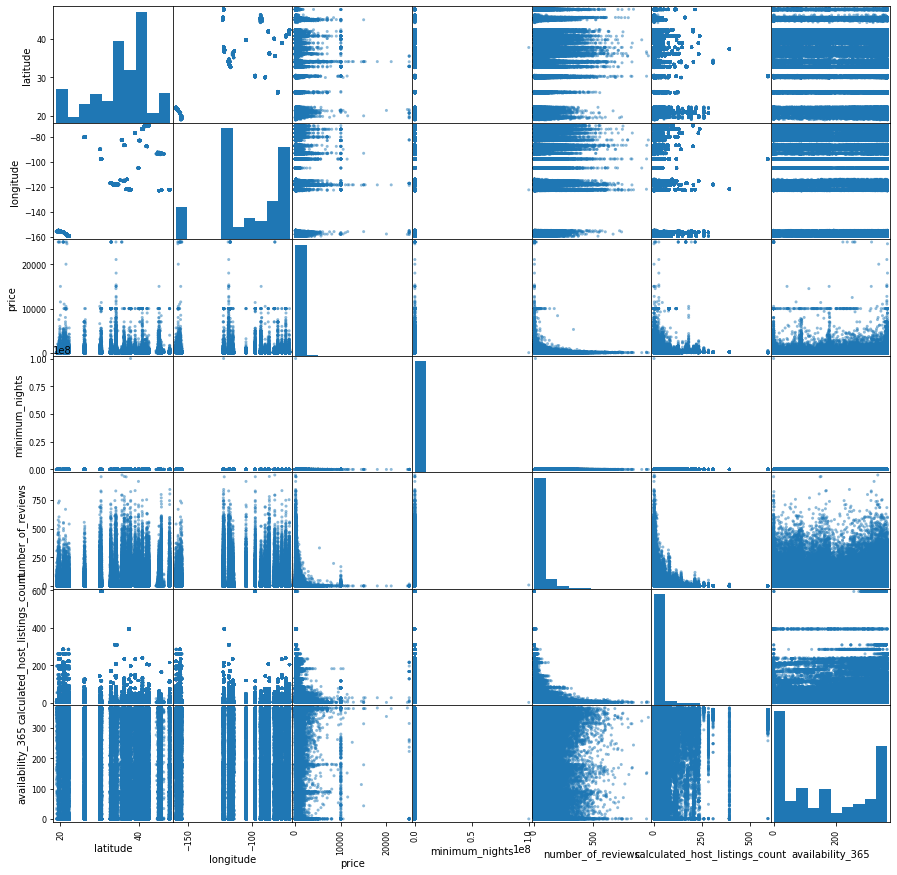

In [10]:
%matplotlib inline
scatter_matrix(df, figsize=(15, 15));

In [11]:
df=df[df.price<15000]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225993 entries, 0 to 226029
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   latitude                        225993 non-null  float64
 1   longitude                       225993 non-null  float64
 2   room_type                       225993 non-null  object 
 3   price                           225993 non-null  int64  
 4   minimum_nights                  225993 non-null  int64  
 5   number_of_reviews               225993 non-null  int64  
 6   calculated_host_listings_count  225993 non-null  int64  
 7   availability_365                225993 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 15.5+ MB


In [13]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,225993.000000,225993.000000,225993.000000,2.259930e+05,225993.000000,225993.000000,225993.000000
mean,35.663978,-103.216288,215.995903,4.526219e+02,34.511949,16.683627,159.320590
std,6.849250,26.220205,488.322478,2.103548e+05,63.606697,51.048719,140.176668
min,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,1.000000,0.000000
25%,32.761810,-118.597780,75.000000,1.000000e+00,1.000000,1.000000,0.000000
50%,37.263090,-97.816290,121.000000,2.000000e+00,8.000000,2.000000,140.000000
75%,40.724050,-76.914620,200.000000,7.000000e+00,39.000000,6.000000,311.000000
max,47.734620,-70.995950,14500.000000,1.000000e+08,966.000000,593.000000,365.000000


In [14]:
df=df[df.minimum_nights<365]

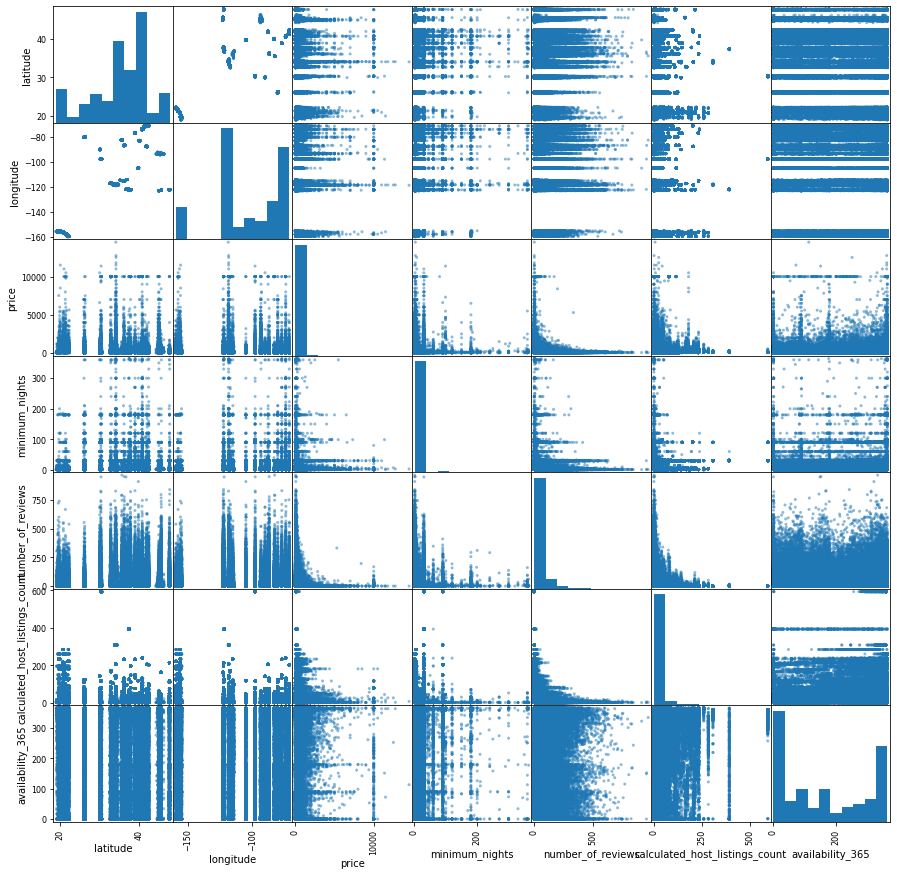

In [15]:
scatter_matrix(df, figsize=(15, 15));

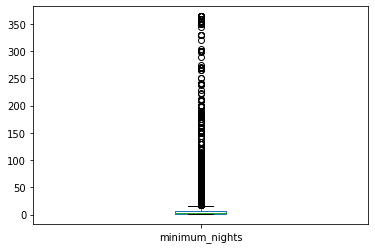

In [21]:
df.minimum_nights.plot.box();

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols